주차장의 요금표와 차량이 들어오고(입차) 나간(출차) 기록이 주어졌을 때, 차량별로 주차 요금을 계산하려고 합니다. 아래는 하나의 예시를 나타냅니다.

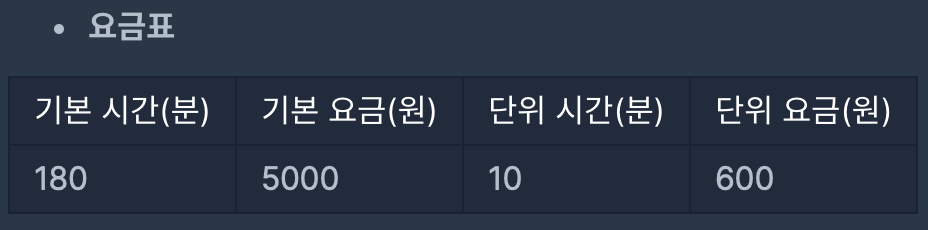

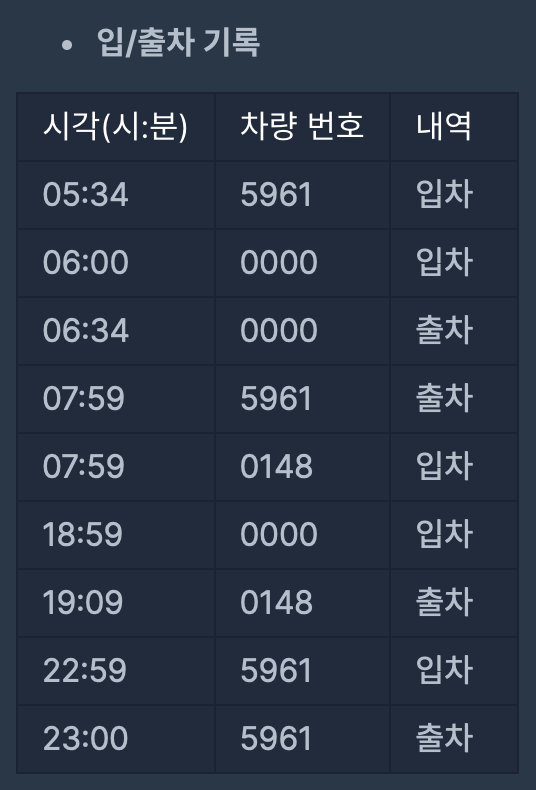

In [49]:
fees = [120, 0, 60, 591] # 기본 3시간, 기본 요금 5천원, 단위 시간 10분, 단위 600원
records = ["16:00 3961 IN", "16:00 0202 IN", "18:00 3961 OUT", "18:00 0202 OUT", "23:58 3961 IN"]



def time_fx(x):

    hour = int(x.split(':')[0])*60
    min = int(x.split(':')[1])
    
    return hour+min

def info(rcd):

    time, car, action = rcd.split()

    return time, car, action

def solution(fees, records):

    import math

    default_hour, default_fee, unit_hour, unit_fee = fees
    info_dic = {}

    for record in records:

        time, car, action = info(record)
        time = time_fx(time)

        if car not in info_dic:

            info_dic[car] = [[time, action]]

        else:

            info_dic[car].append([time, action]) 

    price_dic = {}

    for k,v in info_dic.items():

        t = 0

        if len(v) % 2 != 0: # 출차 기록 없으면 23시 59분 출차로 인정

            v.append([time_fx("23:59"), "OUT"])

        for _ in v:

            if _[1] == "IN":

                t -= _[0]

            else:

                t += _[0]
        
        if t > default_hour: # 기본 시간 이상

            price_dic[k] = int(default_fee + math.ceil((t - default_hour) / unit_hour) * unit_fee)

        else: # 기본 시간 이하, 기본 요금

            price_dic[k] = default_fee

    price_dic = dict(sorted(price_dic.items(), key = lambda x:int(x[0]))) # 차 번호 오름차순 정렬

    answer = list(price_dic.values())

    return answer

solution(fees, records)

[0, 591]

In [61]:
from collections import defaultdict
import math

def time_fx(x):

    hour = int(x.split(':')[0])*60
    min = int(x.split(':')[1])
    
    return hour + min

class Parking:

    def __init__(self, fees):
        
        self.fees = fees
        self.in_flag = False
        self.in_time = 0
        self.total = 0 

    def update(self, time, action): # 입출차 시 상태 업데이트 함수

        # 입차
        if action == "IN": self.in_flag = True
        # 출차
        else: self.in_flag =False

        if self.in_flag == True: self.in_time = time_fx(time)
        else: self.total += time_fx(time) - self.in_time

    def calculate_fee(self):

        if self.in_flag == True: self.update("23:59", "OUT") # 출차 기록 없을 시, 23시 59분 출차로 인정

        calculated_time = self.total - self.fees[0] # 기본 시간 차감
            
        return self.fees[1] + math.ceil(calculated_time/self.fees[2]) * self.fees[3] if calculated_time >= 0 else self.fees[1]     

def solution(fees, records):

    records_dict = defaultdict(lambda:Parking(fees)) 

    for record in records:

        time, car, action = record.split()

        records_dict[car].update(time, action)

    return [v.calculate_fee() for k, v in sorted(records_dict.items())]

solution(fees, records)

[0, 591]